In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set_context("paper")
palette = "ch:start=.2,rot=-.3"

In [3]:
# declare the file paths
assessments_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_assessments.csv"
courses_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_courses.csv"
course_skill_mapping_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_courses_skills.csv"
skills_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_skills.csv"
employee_skill_proficiency_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_employee_skill_proficiency.csv"
employee_file_path = r"D:\Final Project\Data Engineering\Staging\mart\stg_employees.csv"

# Fact Tables 
employee_assessments_courses_path = r"D:\Final Project\Data Engineering\Staging\mart\fct_employee_assessments_courses_combined.csv"
courses_skills_path = r"D:\Final Project\Data Engineering\Staging\mart\fct_courses_skills_combined.csv"
employee_skills_path = r"D:\Final Project\Data Engineering\Staging\mart\fct_employee_skills_combined.csv"

# Read the csv files using pandas
assessments_df = pd.read_csv(assessments_file_path)
courses_df = pd.read_csv(courses_file_path)
course_skill_df = pd.read_csv(course_skill_mapping_file_path)
skills_df = pd.read_csv(skills_file_path)
employee_skill_proficiency_df = pd.read_csv(employee_skill_proficiency_file_path)
employee_df = pd.read_csv(employee_file_path)

employee_performance_df = pd.read_csv(employee_assessments_courses_path)
courses_skills_combined_df = pd.read_csv(courses_skills_path)
employeee_skills_combined_df = pd.read_csv(employee_skills_path)

# Employee Performance KPIs

## Average Assessment Scores for all employess

Text(0, 0.5, 'Average Assessment Score')

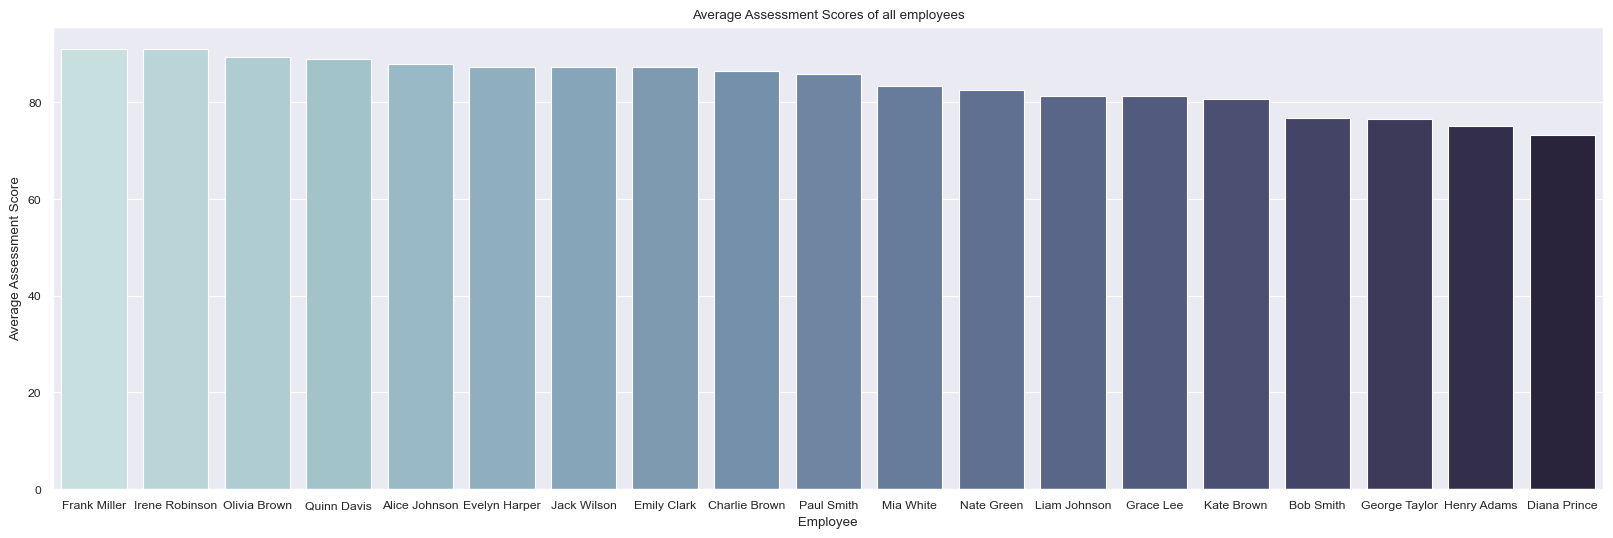

In [53]:
average_Assessment_Scores_df =employee_performance_df.groupby(by = "empname")["assessment_score"].mean().sort_values(ascending=False)

plt.figure(figsize = (20,6))
sns.barplot(x = average_Assessment_Scores_df.index, y =average_Assessment_Scores_df.values, palette = palette )
plt.title("Average Assessment Scores of all employees")
plt.xlabel("Employee")
plt.ylabel("Average Assessment Score")

## Assessment Completion Rate

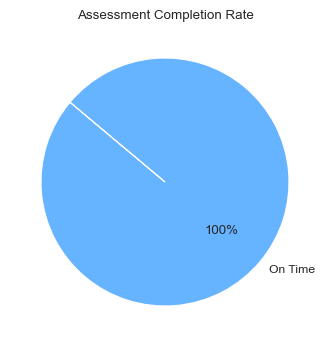

In [44]:
assessment_completion_rate = np.where(employee_performance_df["daysLeft_to_Deadline"].apply(lambda x : int(x.split()[0])), "On Time", "Delayed")
completion_counts = pd.Series(assessment_completion_rate).value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 6))
plt.pie(completion_counts, labels=completion_counts.index, autopct='%1.0f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title("Assessment Completion Rate")
plt.show()

## Skill Proficiency levels for the Employees

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Alice Johnson'),
  Text(1, 0, 'Alice Wong'),
  Text(2, 0, 'Ava Rodriguez'),
  Text(3, 0, 'Benjamin Taylor'),
  Text(4, 0, 'Bob Smith'),
  Text(5, 0, 'Brandon Scott'),
  Text(6, 0, 'Charlie Brown'),
  Text(7, 0, 'Chloe Anderson'),
  Text(8, 0, 'Daniel Thomas'),
  Text(9, 0, 'Diana Prince'),
  Text(10, 0, 'Emily Clark'),
  Text(11, 0, 'Emma Johnson'),
  Text(12, 0, 'Evelyn Harper'),
  Text(13, 0, 'Frank Miller'),
  Text(14, 0, 'George Taylor'),
  Text(15, 0, 'Grace Jackson'),
  Text(16, 0, 'Grace Lee'),
  Text(17, 0, 'Hannah White'),
  Text(18, 0, 'Henry Adams'),
  Text(19, 0, 'Irene Robinson'),
  Text(20, 0, 'Isabella Lewis'),
  Text(21, 0, 'Jack Walker'),
  Text(22, 0, 'Jack Wilson'),
 

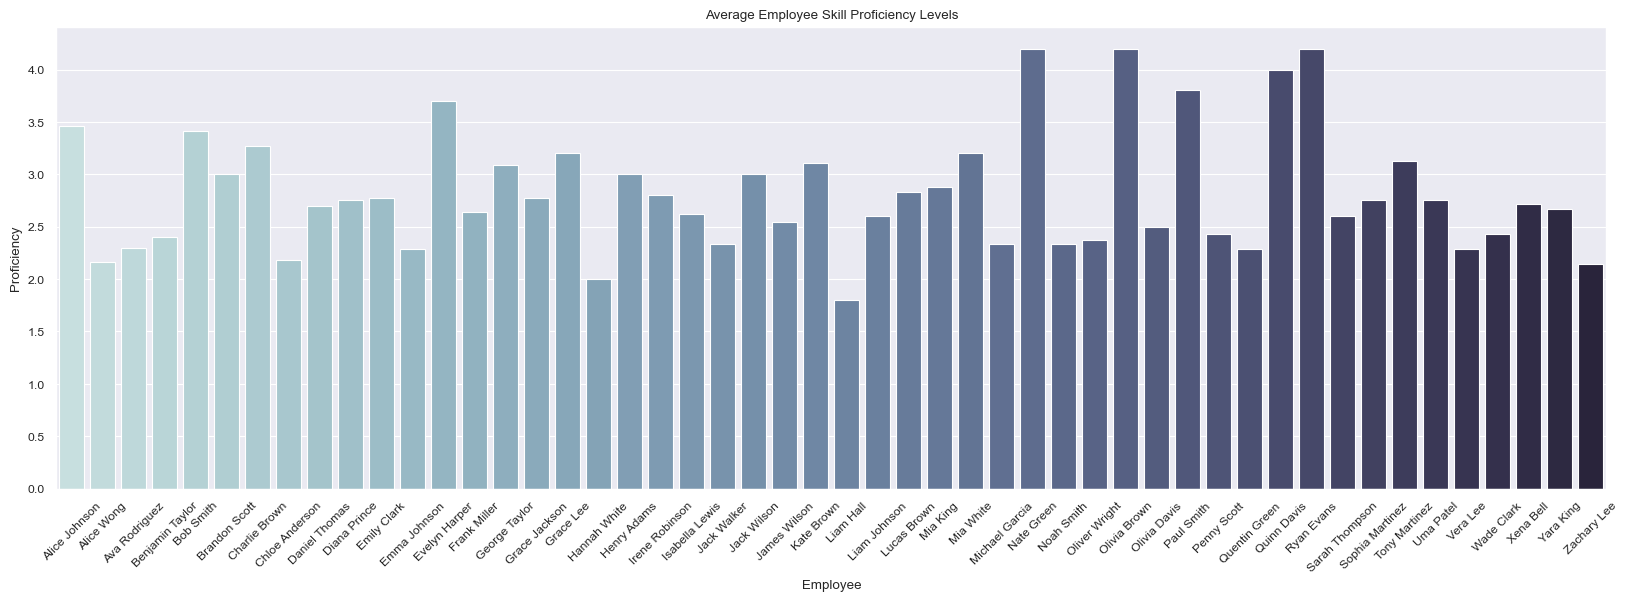

In [54]:
average_skill_proficiency = employeee_skills_combined_df.groupby("empname")["proficiency"].mean()

plt.figure(figsize = (20,6))
sns.barplot(x = average_skill_proficiency.index, y = average_skill_proficiency.values, palette=palette)
plt.title("Average Employee Skill Proficiency Levels")
plt.xlabel("Employee")
plt.ylabel("Proficiency")
plt.xticks(rotation = 45)

## Average Experience Level for different designations

Text(0, 0.5, 'Experience (in years)')

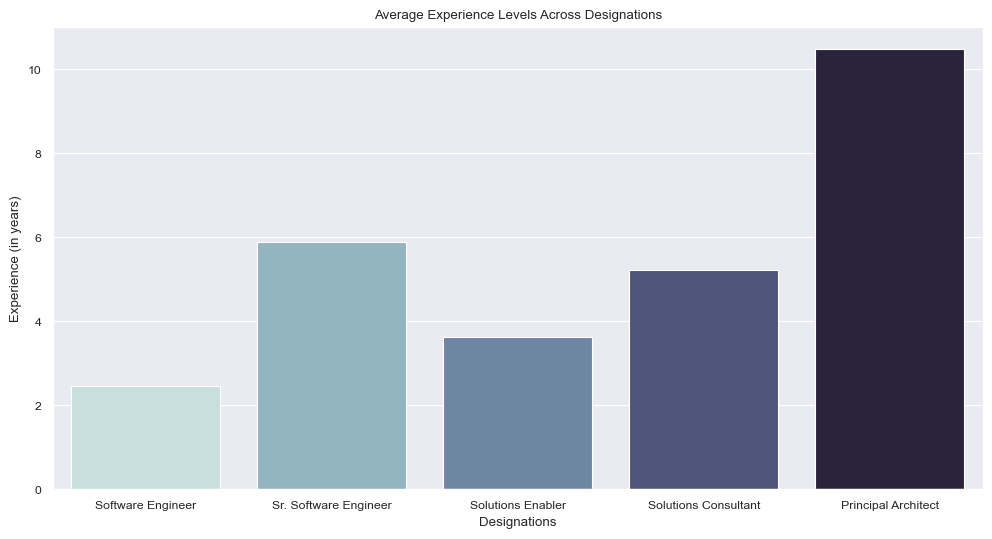

In [55]:
avg_experience_level = employee_df.groupby("designation")["experience"].mean().reindex(["Software Engineer", "Sr. Software Engineer", 
                                                                                           "Solutions Enabler", "Solutions Consultant", 
                                                                                           "Principal Architect"])

plt.figure(figsize = (12,6))
sns.barplot(x = avg_experience_level.index, y = avg_experience_level.values, palette=palette)
plt.title("Average Experience Levels Across Designations")
plt.xlabel("Designations")
plt.ylabel("Experience (in years)")
# plt.xticks(rotation = 45)

## Employee Retention Rate

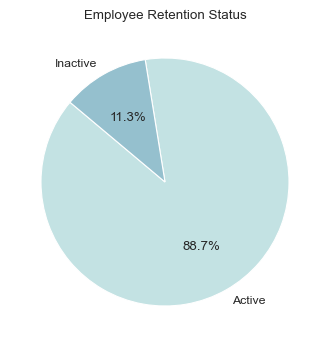

In [63]:
status_counts = employee_df["activestatus"].value_counts()

colors = sns.color_palette(palette)

# Plotting the bar chart
plt.figure(figsize=(4, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Employee Retention Status")
plt.show()